In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

## Importing Data

In [3]:
# Importing the churn data
churn = pd.read_csv("telecom_churn_data.csv")

# Importing the data dictionary
data_dict = pd.read_excel('Data+Dictionary-+Telecom+Churn+Case+Study.xlsx')

In [4]:
churn.head(10)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,

In [5]:
data_dict

,Acronyms,Descriptions
0,MOBILE_NUMBER,Customer phone number
1,CIRCLE_ID,Telecom circle area to which the customer belo...
2,LOC,Local calls - within same telecom circle
3,STD,STD calls - outside the calling circle
4,IC,Incoming calls
5,OG,Outgoing calls
6,T2T,"Operator T to T, i.e. within same operator (mo..."
7,T2M,Operator T to other operator mobile
8,T2O,Operator T to other operator fixed line
9,T2F,Operator T to fixed lines of T


In [6]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [7]:
churn.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [8]:
original = churn.copy()

# Dara Preparation


-------

#### Creating different category of columns present in the database. We would need them to perform some bulk action.

In [9]:
# Define column names by type
id_cols = ['mobile_number', 'circle_id']

date_cols = [f'last_date_of_month_{i}' for i in range(6, 10)]
date_cols += [f'date_of_last_rech_{i}' for i in range(6, 10)]
date_cols += [f'date_of_last_rech_data_{i}' for i in range(6, 10)]

cat_cols =  [f'night_pck_user_{i}' for i in range(6, 10)]
cat_cols += [f'fb_user_{i}' for i in range(6, 10)]

# Determine numeric columns
num_cols = set(churn.columns) - set(id_cols) - set(date_cols) - set(cat_cols)

# Print the number of columns in each list
print("#ID cols:", len(id_cols))
print("#Date cols:", len(date_cols))
print("#Numeric cols:", len(num_cols))
print("#Category cols:", len(cat_cols))

# Check if we have missed any column or not
print(len(id_cols) + len(date_cols) + len(num_cols) + len(cat_cols) == churn.shape[1])


#ID cols: 2
#Date cols: 12
#Numeric cols: 204
#Category cols: 8
True


## Null value analysis and imputation

In [10]:
# Defining a function that would provide columns with null value

def columns_missing_percentage(df):
    total_rows = len(df)
    missing_percentages = [(col, df[col].isnull().mean() * 100) for col in df.columns]
    sorted_columns = sorted(missing_percentages, key=lambda x: x[1], reverse=True)
    return sorted_columns

# Getting the null columns in data frame
columns_missing_percentage(churn)


[('date_of_last_rech_data_6', 74.84674846748467),
 ('total_rech_data_6', 74.84674846748467),
 ('max_rech_data_6', 74.84674846748467),
 ('count_rech_2g_6', 74.84674846748467),
 ('count_rech_3g_6', 74.84674846748467),
 ('av_rech_amt_data_6', 74.84674846748467),
 ('arpu_3g_6', 74.84674846748467),
 ('arpu_2g_6', 74.84674846748467),
 ('night_pck_user_6', 74.84674846748467),
 ('fb_user_6', 74.84674846748467),
 ('date_of_last_rech_data_7', 74.42874428744287),
 ('total_rech_data_7', 74.42874428744287),
 ('max_rech_data_7', 74.42874428744287),
 ('count_rech_2g_7', 74.42874428744287),
 ('count_rech_3g_7', 74.42874428744287),
 ('av_rech_amt_data_7', 74.42874428744287),
 ('arpu_3g_7', 74.42874428744287),
 ('arpu_2g_7', 74.42874428744287),
 ('night_pck_user_7', 74.42874428744287),
 ('fb_user_7', 74.42874428744287),
 ('date_of_last_rech_data_9', 74.07774077740777),
 ('total_rech_data_9', 74.07774077740777),
 ('max_rech_data_9', 74.07774077740777),
 ('count_rech_2g_9', 74.07774077740777),
 ('count_re

#### Impute missing values with zeroes, given richarge columns are important attributes and we cannot drop them

In [11]:
# create a list of recharge columns where we will impute missing values with zeroes, given richarge columns are important attributes and we cannot drop them

zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]

In [12]:
# impute missing values with 0
churn[zero_impute] = churn[zero_impute].apply(lambda x: x.fillna(0))

In [13]:
# Getting the null columns in data frame
columns_missing_percentage(churn)

[('date_of_last_rech_data_6', 74.84674846748467),
 ('count_rech_2g_6', 74.84674846748467),
 ('count_rech_3g_6', 74.84674846748467),
 ('arpu_3g_6', 74.84674846748467),
 ('arpu_2g_6', 74.84674846748467),
 ('night_pck_user_6', 74.84674846748467),
 ('fb_user_6', 74.84674846748467),
 ('date_of_last_rech_data_7', 74.42874428744287),
 ('count_rech_2g_7', 74.42874428744287),
 ('count_rech_3g_7', 74.42874428744287),
 ('arpu_3g_7', 74.42874428744287),
 ('arpu_2g_7', 74.42874428744287),
 ('night_pck_user_7', 74.42874428744287),
 ('fb_user_7', 74.42874428744287),
 ('date_of_last_rech_data_9', 74.07774077740777),
 ('count_rech_2g_9', 74.07774077740777),
 ('count_rech_3g_9', 74.07774077740777),
 ('arpu_3g_9', 74.07774077740777),
 ('arpu_2g_9', 74.07774077740777),
 ('night_pck_user_9', 74.07774077740777),
 ('fb_user_9', 74.07774077740777),
 ('date_of_last_rech_data_8', 73.66073660736608),
 ('count_rech_2g_8', 73.66073660736608),
 ('count_rech_3g_8', 73.66073660736608),
 ('arpu_3g_8', 73.6607366073660

In [14]:
# drop id and date columns
churn = churn.drop(id_cols + date_cols, axis=1)
churn.shape

(99999, 212)

In [15]:
# replace missing values with '-1' in categorical columns
churn[cat_cols] = churn[cat_cols].apply(lambda x: x.fillna(-1))

In [16]:
# Getting the null columns in data frame
columns_missing_percentage(churn)

[('count_rech_2g_6', 74.84674846748467),
 ('count_rech_3g_6', 74.84674846748467),
 ('arpu_3g_6', 74.84674846748467),
 ('arpu_2g_6', 74.84674846748467),
 ('count_rech_2g_7', 74.42874428744287),
 ('count_rech_3g_7', 74.42874428744287),
 ('arpu_3g_7', 74.42874428744287),
 ('arpu_2g_7', 74.42874428744287),
 ('count_rech_2g_9', 74.07774077740777),
 ('count_rech_3g_9', 74.07774077740777),
 ('arpu_3g_9', 74.07774077740777),
 ('arpu_2g_9', 74.07774077740777),
 ('count_rech_2g_8', 73.66073660736608),
 ('count_rech_3g_8', 73.66073660736608),
 ('arpu_3g_8', 73.66073660736608),
 ('arpu_2g_8', 73.66073660736608),
 ('onnet_mou_9', 7.745077450774509),
 ('offnet_mou_9', 7.745077450774509),
 ('roam_ic_mou_9', 7.745077450774509),
 ('roam_og_mou_9', 7.745077450774509),
 ('loc_og_t2t_mou_9', 7.745077450774509),
 ('loc_og_t2m_mou_9', 7.745077450774509),
 ('loc_og_t2f_mou_9', 7.745077450774509),
 ('loc_og_t2c_mou_9', 7.745077450774509),
 ('loc_og_mou_9', 7.745077450774509),
 ('std_og_t2t_mou_9', 7.745077450


#### Dropping Columns where the missing values are more than 70%

In [17]:
def drop_columns_with_high_missing_percentage(df, threshold=70):
    total_rows = len(df)
    columns_to_drop = [col for col in df.columns if (df[col].isnull().mean() * 100) > threshold]
    cleaned_df = df.drop(columns=columns_to_drop)
    return cleaned_df, columns_to_drop

churn, dropped_columns = drop_columns_with_high_missing_percentage(churn, threshold=70)
print("Columns dropped due to high missing percentage:", dropped_columns)


Columns dropped due to high missing percentage: ['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9']


In [18]:
# Getting the null columns in data frame
columns_missing_percentage(churn)

[('onnet_mou_9', 7.745077450774509),
 ('offnet_mou_9', 7.745077450774509),
 ('roam_ic_mou_9', 7.745077450774509),
 ('roam_og_mou_9', 7.745077450774509),
 ('loc_og_t2t_mou_9', 7.745077450774509),
 ('loc_og_t2m_mou_9', 7.745077450774509),
 ('loc_og_t2f_mou_9', 7.745077450774509),
 ('loc_og_t2c_mou_9', 7.745077450774509),
 ('loc_og_mou_9', 7.745077450774509),
 ('std_og_t2t_mou_9', 7.745077450774509),
 ('std_og_t2m_mou_9', 7.745077450774509),
 ('std_og_t2f_mou_9', 7.745077450774509),
 ('std_og_t2c_mou_9', 7.745077450774509),
 ('std_og_mou_9', 7.745077450774509),
 ('isd_og_mou_9', 7.745077450774509),
 ('spl_og_mou_9', 7.745077450774509),
 ('og_others_9', 7.745077450774509),
 ('loc_ic_t2t_mou_9', 7.745077450774509),
 ('loc_ic_t2m_mou_9', 7.745077450774509),
 ('loc_ic_t2f_mou_9', 7.745077450774509),
 ('loc_ic_mou_9', 7.745077450774509),
 ('std_ic_t2t_mou_9', 7.745077450774509),
 ('std_ic_t2m_mou_9', 7.745077450774509),
 ('std_ic_t2f_mou_9', 7.745077450774509),
 ('std_ic_t2o_mou_9', 7.74507745

In [19]:
churn.shape

(99999, 196)

In [20]:
# Determine the data types of each column
data_types = churn.dtypes

# Display the data types
print(data_types)

loc_og_t2o_mou        float64
std_og_t2o_mou        float64
loc_ic_t2o_mou        float64
arpu_6                float64
arpu_7                float64
arpu_8                float64
arpu_9                float64
onnet_mou_6           float64
onnet_mou_7           float64
onnet_mou_8           float64
onnet_mou_9           float64
offnet_mou_6          float64
offnet_mou_7          float64
offnet_mou_8          float64
offnet_mou_9          float64
roam_ic_mou_6         float64
roam_ic_mou_7         float64
roam_ic_mou_8         float64
roam_ic_mou_9         float64
roam_og_mou_6         float64
roam_og_mou_7         float64
roam_og_mou_8         float64
roam_og_mou_9         float64
loc_og_t2t_mou_6      float64
loc_og_t2t_mou_7      float64
loc_og_t2t_mou_8      float64
loc_og_t2t_mou_9      float64
loc_og_t2m_mou_6      float64
loc_og_t2m_mou_7      float64
loc_og_t2m_mou_8      float64
loc_og_t2m_mou_9      float64
loc_og_t2f_mou_6      float64
loc_og_t2f_mou_7      float64
loc_og_t2f

#### Filter high-value customers

In [21]:
# Calculate the total data-recharge and  total recharge amount amount for June and July

churn['total_data_rech_6'] = churn.total_rech_data_6 * churn.av_rech_amt_data_6
churn['total_data_rech_7'] = churn.total_rech_data_7 * churn.av_rech_amt_data_7
churn['amt_data_6'] = churn.total_rech_amt_6 + churn.total_data_rech_6
churn['amt_data_7'] = churn.total_rech_amt_7 + churn.total_data_rech_7

# calculate average recharge done by customer in June and July

churn['av_amt_data_6_7'] = (churn.amt_data_6 + churn.amt_data_7)/2

In [22]:
# look at the 70th percentile recharge amount

print("Recharge amount at 70th percentile: {0}".format(churn.av_amt_data_6_7.quantile(0.7)))

# Keeping customers who have recharged their mobiles with more than or equal to 70th percentile amount

churn_filtered = churn.loc[churn.av_amt_data_6_7 >= churn.av_amt_data_6_7.quantile(0.7), :]
churn_filtered = churn_filtered.reset_index(drop=True)
churn_filtered.shape

Recharge amount at 70th percentile: 478.0


(30001, 201)

In [23]:
# Removing variables created to filter high-value customers

churn_filtered = churn_filtered.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)
churn_filtered.shape

(30001, 196)

In [24]:
columns_missing_percentage(churn_filtered)

[('onnet_mou_9', 6.33645545148495),
 ('offnet_mou_9', 6.33645545148495),
 ('roam_ic_mou_9', 6.33645545148495),
 ('roam_og_mou_9', 6.33645545148495),
 ('loc_og_t2t_mou_9', 6.33645545148495),
 ('loc_og_t2m_mou_9', 6.33645545148495),
 ('loc_og_t2f_mou_9', 6.33645545148495),
 ('loc_og_t2c_mou_9', 6.33645545148495),
 ('loc_og_mou_9', 6.33645545148495),
 ('std_og_t2t_mou_9', 6.33645545148495),
 ('std_og_t2m_mou_9', 6.33645545148495),
 ('std_og_t2f_mou_9', 6.33645545148495),
 ('std_og_t2c_mou_9', 6.33645545148495),
 ('std_og_mou_9', 6.33645545148495),
 ('isd_og_mou_9', 6.33645545148495),
 ('spl_og_mou_9', 6.33645545148495),
 ('og_others_9', 6.33645545148495),
 ('loc_ic_t2t_mou_9', 6.33645545148495),
 ('loc_ic_t2m_mou_9', 6.33645545148495),
 ('loc_ic_t2f_mou_9', 6.33645545148495),
 ('loc_ic_mou_9', 6.33645545148495),
 ('std_ic_t2t_mou_9', 6.33645545148495),
 ('std_ic_t2m_mou_9', 6.33645545148495),
 ('std_ic_t2f_mou_9', 6.33645545148495),
 ('std_ic_t2o_mou_9', 6.33645545148495),
 ('std_ic_mou_9

In [25]:
# Define the columns with missing values
columns_with_missing_values = [
    'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 
    'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 
    'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 
    'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 
    'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 
    'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 
    'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 
    'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 
    'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8', 
    'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_t2c_mou_8', 'std_og_mou_8', 
    'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8', 
    'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 
    'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_t2o_mou_8', 'std_ic_mou_8', 
    'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8', 
    'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'roam_og_mou_6', 
    'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 
    'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_t2c_mou_6', 'std_og_mou_6', 
    'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6', 
    'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 
    'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_t2o_mou_6', 'std_ic_mou_6', 
    'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6', 
    'onnet_mou_7', 'offnet_mou_7', 'roam_ic_mou_7', 'roam_og_mou_7', 
    'loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 
    'std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7', 'std_og_t2c_mou_7', 'std_og_mou_7', 
    'isd_og_mou_7', 'spl_og_mou_7', 'og_others_7', 
    'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7', 
    'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7', 'std_ic_t2o_mou_7', 'std_ic_mou_7', 
    'spl_ic_mou_7', 'isd_ic_mou_7', 'ic_others_7', 
    'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou'
]

# Drop rows with any null values in the specified columns
churn_filtered_cleaned = churn_filtered.dropna(subset=columns_with_missing_values)


In [26]:
churn_filtered_cleaned.shape

(27629, 196)

In [27]:
columns_missing_percentage(churn_filtered_cleaned)

[('loc_og_t2o_mou', 0.0),
 ('std_og_t2o_mou', 0.0),
 ('loc_ic_t2o_mou', 0.0),
 ('arpu_6', 0.0),
 ('arpu_7', 0.0),
 ('arpu_8', 0.0),
 ('arpu_9', 0.0),
 ('onnet_mou_6', 0.0),
 ('onnet_mou_7', 0.0),
 ('onnet_mou_8', 0.0),
 ('onnet_mou_9', 0.0),
 ('offnet_mou_6', 0.0),
 ('offnet_mou_7', 0.0),
 ('offnet_mou_8', 0.0),
 ('offnet_mou_9', 0.0),
 ('roam_ic_mou_6', 0.0),
 ('roam_ic_mou_7', 0.0),
 ('roam_ic_mou_8', 0.0),
 ('roam_ic_mou_9', 0.0),
 ('roam_og_mou_6', 0.0),
 ('roam_og_mou_7', 0.0),
 ('roam_og_mou_8', 0.0),
 ('roam_og_mou_9', 0.0),
 ('loc_og_t2t_mou_6', 0.0),
 ('loc_og_t2t_mou_7', 0.0),
 ('loc_og_t2t_mou_8', 0.0),
 ('loc_og_t2t_mou_9', 0.0),
 ('loc_og_t2m_mou_6', 0.0),
 ('loc_og_t2m_mou_7', 0.0),
 ('loc_og_t2m_mou_8', 0.0),
 ('loc_og_t2m_mou_9', 0.0),
 ('loc_og_t2f_mou_6', 0.0),
 ('loc_og_t2f_mou_7', 0.0),
 ('loc_og_t2f_mou_8', 0.0),
 ('loc_og_t2f_mou_9', 0.0),
 ('loc_og_t2c_mou_6', 0.0),
 ('loc_og_t2c_mou_7', 0.0),
 ('loc_og_t2c_mou_8', 0.0),
 ('loc_og_t2c_mou_9', 0.0),
 ('loc_og_mou_

In [28]:
churn_filtered = churn_filtered_cleaned

In [29]:
# Calculate total incoming and outgoing minutes of usage
churn_filtered['total_calls_mou_9'] = churn_filtered.total_ic_mou_9 + churn_filtered.total_og_mou_9

In [30]:
# Calculate 2g and 3g data consumption

churn_filtered['total_internet_mb_9'] =  churn_filtered.vol_2g_mb_9 + churn_filtered.vol_3g_mb_9

In [31]:
# Churn variable: customer who have not used either calls or internet in the month of September are customers who have churned
# 0 - not churn, 1 - churn

churn_filtered['churn'] = churn_filtered.apply(lambda row: 1 if (row.total_calls_mou_9 == 0 and row.total_internet_mb_9 == 0) else 0, axis=1)

In [32]:
# Delete derived variables

churn_filtered = churn_filtered.drop(['total_calls_mou_9', 'total_internet_mb_9'], axis=1)

In [33]:
# Change data type to category

churn_filtered.churn = churn_filtered.churn.astype("category")

# Check for the imbalance

print("Churn Ratio:")
print(churn_filtered.churn.value_counts()*100/churn_filtered.shape[0])

Churn Ratio:
churn
0    97.245648
1     2.754352
Name: count, dtype: float64


In [34]:
months = [6, 7, 8]

for feature in ['arpu', 'onnet_mou', 'offnet_mou', 'roam_ic_mou', 'roam_og_mou', 
                'loc_og_mou', 'std_og_mou', 'isd_og_mou', 'spl_og_mou', 'total_og_mou', 
                'loc_ic_mou', 'std_ic_mou', 'isd_ic_mou', 'spl_ic_mou', 'total_ic_mou', 
                'total_rech_num', 'total_rech_amt', 'max_rech_amt', 'total_rech_data', 
                'max_rech_data', 'av_rech_amt_data', 'vol_2g_mb', 'vol_3g_mb']:
    
    # Calculate the average of months 6-7
    avg_6_7 = (churn_filtered[f'{feature}_6'] + churn_filtered[f'{feature}_7']) / 2
    
    # Calculate the difference between month 8 and the average of months 6-7
    churn_filtered[f'{feature}_diff'] = churn_filtered[f'{feature}_8'] - avg_6_7


In [35]:
# let's look at summary of one of the difference variables

churn_filtered['total_og_mou_diff'].describe()

count    27629.000000
mean       -46.289048
std        483.947646
min      -7213.410000
25%       -154.105000
50%        -12.910000
75%         78.560000
max      12768.705000
Name: total_og_mou_diff, dtype: float64

In [36]:
# Delete all variables relating to 9th month

churn_filtered = churn_filtered.filter(regex='[^9]$', axis=1)
churn_filtered.shape

(27629, 173)

In [37]:
# extract all names that end with 9

col_9_names = churn.filter(regex='9$', axis=1).columns

# update num_cols and cat_cols column name list

cat_cols = [col for col in cat_cols if col not in col_9_names]
cat_cols.append('churn')
num_cols = [col for col in churn_filtered.columns if col not in cat_cols]

In [38]:
# Change columns types

churn_filtered[num_cols] = churn_filtered[num_cols].apply(pd.to_numeric)
churn_filtered[cat_cols] = churn_filtered[cat_cols].apply(lambda column: column.astype("category"), axis=0)

In [39]:
# create plotting functions
def data_type(variable):
    if variable.dtype == np.int64 or variable.dtype == np.float64:
        return 'numerical'
    elif variable.dtype == 'category':
        return 'categorical'
    
def univariate(variable, stats=True):
    
    if data_type(variable) == 'numerical':
        sns.distplot(variable)
        if stats == True:
            print(variable.describe())
    
    elif data_type(variable) == 'categorical':
        sns.countplot(variable)
        if stats == True:
            print(variable.value_counts())
            
    else:
        print("Invalid variable passed: either pass a numeric variable or a categorical vairable.")
        
def bivariate(var1, var2):
    if data_type(var1) == 'numerical' and data_type(var2) == 'numerical':
        sns.regplot(var1, var2)
    elif (data_type(var1) == 'categorical' and data_type(var2) == 'numerical') or \
         (data_type(var1) == 'numerical' and data_type(var2) == 'categorical'):        
        sns.boxplot(x=var1, y=var2)


count    98981.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: loc_og_t2o_mou, dtype: float64


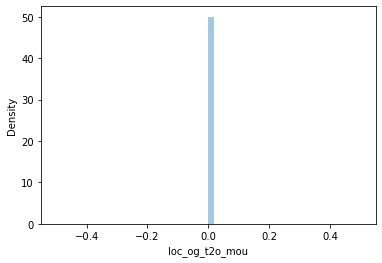

In [40]:
univariate(churn.loc_og_t2o_mou)

count    98981.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: std_og_t2o_mou, dtype: float64


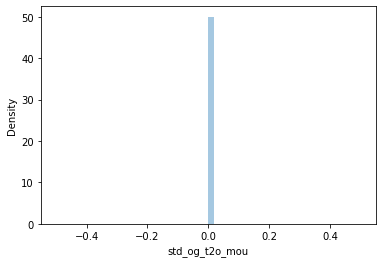

In [41]:
univariate(churn.std_og_t2o_mou)

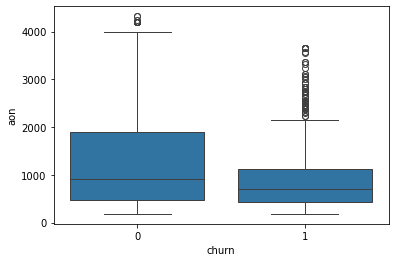

In [42]:
bivariate(churn_filtered.churn, churn_filtered.aon)

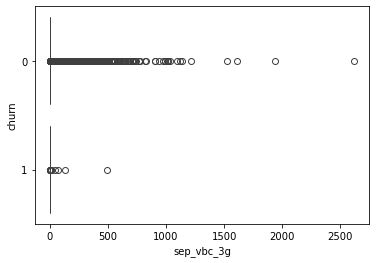

In [43]:
bivariate(churn_filtered.sep_vbc_3g, churn_filtered.churn)

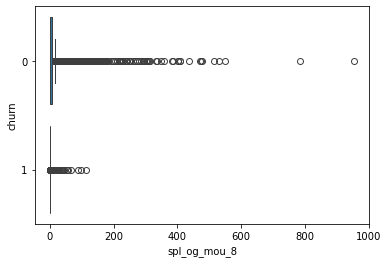

In [44]:
bivariate(churn_filtered.spl_og_mou_8, churn_filtered.churn)

In [45]:
pd.crosstab(churn_filtered.churn, churn_filtered.night_pck_user_8, normalize='columns')*100

night_pck_user_8,-1.0,0.0,1.0
churn,,,
0,95.008827,99.103532,98.187311
1,4.991173,0.896468,1.812689


In [46]:
pd.crosstab(churn_filtered.churn, churn_filtered.sachet_3g_8)

sachet_3g_8,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,23,25,27,29,30,38,41
churn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,24364,1561,384,179,103,83,40,33,26,17,15,8,11,10,6,5,2,2,3,1,3,3,2,1,1,1,2,1,1
1,739,12,3,3,0,2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [47]:
def cap_outliers(array, k=3):
    # Calculate upper and lower limits
    upper_limit = array.mean() + k * array.std()
    lower_limit = array.mean() - k * array.std()
    
    # Cap outliers
    array[array < lower_limit] = lower_limit
    array[array > upper_limit] = upper_limit
    
    return array


In [48]:
# example of capping
sample_array = list(range(100))

# add outliers to the data
sample_array[0] = -9999
sample_array[99] = 9999

# cap outliers
sample_array = np.array(sample_array)
print("Array after capping outliers: \n", cap_outliers(sample_array, k=2))

Array after capping outliers: 
 [-2780     1     2     3     4     5     6     7     8     9    10    11
    12    13    14    15    16    17    18    19    20    21    22    23
    24    25    26    27    28    29    30    31    32    33    34    35
    36    37    38    39    40    41    42    43    44    45    46    47
    48    49    50    51    52    53    54    55    56    57    58    59
    60    61    62    63    64    65    66    67    68    69    70    71
    72    73    74    75    76    77    78    79    80    81    82    83
    84    85    86    87    88    89    90    91    92    93    94    95
    96    97    98  2877]


In [49]:
# cap outliers in the numeric columns
churn_filtered[num_cols] = churn_filtered[num_cols].apply(cap_outliers, axis=0)

In [50]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [51]:
# change churn to numeric

churn_filtered['churn'] = pd.to_numeric(churn_filtered['churn'])

In [52]:
# divide data into train and test

X = churn_filtered.drop("churn", axis = 1)
y = churn_filtered.churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)

In [53]:
# print shapes of train and test sets
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(20721, 172)

(20721,)

(6908, 172)

(6908,)

In [54]:
train = pd.concat([X_train, y_train], axis=1)

# aggregate the categorical variables
categorical_vars = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']

for var in categorical_vars:
    # Calculate the mean for each category of the variable
    agg_values = train.groupby(var)['churn'].mean()
    # Replace the values in the original DataFrame with the aggregated values
    X_train[var] = X_train[var].map(agg_values)
    X_test[var] = X_test[var].map(agg_values)



In [55]:
# check data type of categorical columns - make sure they are numeric
X_train[[col for col in cat_cols if col not in ['churn']]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 20721 entries, 18341 to 15682
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   night_pck_user_6  20721 non-null  category
 1   night_pck_user_7  20721 non-null  category
 2   night_pck_user_8  20721 non-null  category
 3   fb_user_6         20721 non-null  category
 4   fb_user_7         20721 non-null  category
 5   fb_user_8         20721 non-null  category
dtypes: category(6)
memory usage: 284.1 KB


In [56]:
# apply pca to train data

pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

In [57]:
pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA())])

In [58]:
# Extract PCA model from pipeline
pca = pca.named_steps['pca']

# Look at explained variance of PCA components
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.round(np.cumsum(explained_variance_ratio) * 100, 4)

# Print the explained variance
print(pd.Series(cumulative_explained_variance))

0       11.5072
1       21.0513
2       26.7524
3       31.5289
4       35.6259
5       39.3599
6       42.1626
7       44.7314
8       47.0603
9       49.2604
10      51.3246
11      53.2878
12      55.0698
13      56.7942
14      58.4195
15      59.9208
16      61.3160
17      62.6645
18      63.9585
19      65.1825
20      66.3700
21      67.5504
22      68.6632
23      69.7501
24      70.7810
25      71.7523
26      72.7103
27      73.6163
28      74.4975
29      75.3659
30      76.1940
31      77.0045
32      77.7925
33      78.5662
34      79.3193
35      80.0708
36      80.7934
37      81.4873
38      82.1437
39      82.7922
40      83.4154
41      83.9763
42      84.5286
43      85.0670
44      85.5934
45      86.1066
46      86.6057
47      87.0793
48      87.5469
49      87.9792
50      88.3981
51      88.8072
52      89.1889
53      89.5655
54      89.9264
55      90.2804
56      90.6250
57      90.9605
58      91.2799
59      91.5948
60      91.9045
61      92.1975
62      

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Cumulative Explained Variance of PCA Components')

Text(0.5, 0, 'Number of Components')

Text(0, 0.5, 'Cumulative Explained Variance (%)')

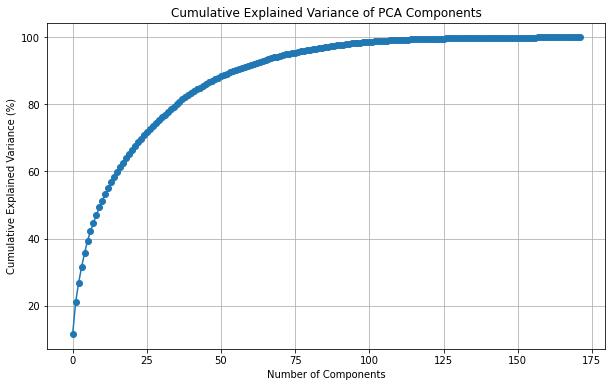

In [59]:

# Plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_) * 100, decimals=4)

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(features, cumulative_variance, marker='o', linestyle='-')
plt.title('Cumulative Explained Variance of PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.grid(True)
plt.show()


In [60]:
# create pipeline
PCA_VARS = 60
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [61]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=60)),
                ('logistic', LogisticRegression(class_weight='balanced'))])

0.8500554992519666

In [62]:
y_pred = pipeline.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob), 2))


[[5700 1018]
 [  34  156]]
Sensitivity: 	0.82
Specificity: 	0.85
AUC:    	 0.92


<Figure size 576x432 with 0 Axes>

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver Operating Characteristic (ROC) Curve')

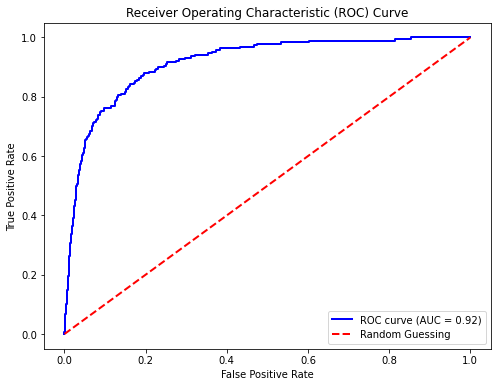

In [63]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [64]:
# class imbalance
y_train.value_counts()/y_train.shape

churn
0    0.972443
1    0.027557
Name: count, dtype: float64

## Cross Validation

In [65]:
# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [66]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


/Users/bhagabatiprasadmishra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/bhagabatiprasadmishra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

/Users/bhagabatiprasadmishra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/bhagabatiprasadmishra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

/Users/bhagabatiprasadmishra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/bhagabatiprasadmishra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [60, 80]},
             scoring='roc_auc', verbose=1)

In [67]:
# cross validation results
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.077454,0.092782,0.000000,0.000000,0.1,l1,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
1,2.564554,0.075848,0.000000,0.000000,0.1,l1,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
2,2.483696,0.207821,0.097839,0.013468,0.1,l2,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.906352,0.925783,0.937206,0.895762,0.944939,0.922008,0.018466,2
3,2.827961,0.092084,0.110219,0.024540,0.1,l2,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.909280,0.925093,0.939230,0.893137,0.948013,0.922951,0.019867,1
4,1.550338,0.056530,0.000000,0.000000,0.5,l1,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
5,2.491548,0.474471,0.000000,0.000000,0.5,l1,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
6,3.316981,0.183737,0.109746,0.018113,0.5,l2,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.905614,0.925728,0.937236,0.894225,0.944130,0.921387,0.018835,12
7,3.650718,0.175862,0.109021,0.005900,0.5,l2,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.908042,0.923715,0.938792,0.891276,0.947233,0.921812,0.020299,5
8,2.063920,0.041771,0.000000,0.000000,1,l1,60,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
9,3.054278,0.197674,0.000000,0.000000,1,l1,80,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,17


In [68]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.9229505028078883
Best hyperparameters:  {'logistic__C': 0.1, 'logistic__penalty': 'l2', 'pca__n_components': 80}


In [69]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[6401  317]
 [  67  123]]
Sensitivity: 	0.65
Specificity: 	0.95
AUC:    	 0.92


In [70]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [71]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 0.4]},
             scoring='roc_auc', verbose=1)

In [72]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.9655257157890951
Best hyperparameters:  {'criterion': 'gini', 'max_features': 0.4}


In [73]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[6662   56]
 [ 122   68]]
Sensitivity: 	0.36
Specificity: 	0.99
AUC:    	 0.96


In [74]:
# run a random forest model on train data
max_features = int(round(np.sqrt(X_train.shape[1])))    # number of variables to consider to split each node
print(max_features)

rf_model = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)

13


In [75]:
# fit model
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    5.5s


RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_features=13,
                       oob_score=True, random_state=4, verbose=1)

In [76]:
# OOB score
rf_model.oob_score_

0.9744703440953622

In [77]:
# predict churn on test data
y_pred = rf_model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[6673   45]
 [ 137   53]]
Sensitivity: 	0.28
Specificity: 	0.99
ROC:    	 0.96


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [79]:
# predictors
features = churn_filtered.drop('churn', axis=1).columns

# feature_importance
importance = rf_model.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 100.0


,variables,importance_percentage
0,roam_og_mou_8,9.619378
1,roam_ic_mou_8,6.275407
2,total_ic_mou_8,6.254749
3,loc_ic_mou_8,5.577830
4,loc_ic_t2m_mou_8,4.608559
5,roam_ic_mou_diff,3.716589
6,total_og_mou_8,3.019194
7,roam_og_mou_diff,2.969819
8,std_og_mou_diff,2.887421
9,loc_og_mou_8,2.525335


In [78]:
# extract top 'n' features
top_n = 30
top_features = feature_importance.variables[0:top_n]

NameError: name 'feature_importance' is not defined

<AxesSubplot:>

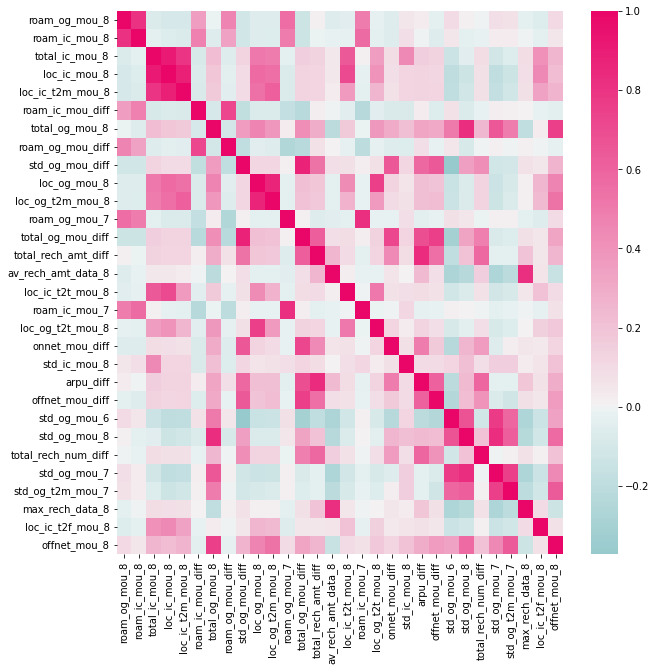

In [81]:
# plot feature correlation
import seaborn as sns
plt.rcParams["figure.figsize"] =(10,10)
mycmap = sns.diverging_palette(199, 359, s=99, center="light", as_cmap=True)
sns.heatmap(data=X_train[top_features].corr(), center=0.0, cmap=mycmap)

In [79]:
top_features = ['total_ic_mou_8', 'total_rech_amt_diff', 'total_og_mou_8', 'arpu_8', 'roam_ic_mou_8', 'roam_og_mou_8', 
                'std_ic_mou_8', 'av_rech_amt_data_8', 'std_og_mou_8']
X_train = X_train[top_features]
X_test = X_test[top_features]

In [80]:
# logistic regression
steps = [('scaler', StandardScaler()), 
         ("logistic", LogisticRegression(class_weight={0:0.1, 1:0.9}))
        ]

# compile pipeline
logistic = Pipeline(steps)

# hyperparameter space
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [81]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [82]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.9161194208955337
Best hyperparameters:  {'logistic__C': 10, 'logistic__penalty': 'l2'}


In [83]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[6394  324]
 [  72  118]]
Sensitivity: 	0.62
Specificity: 	0.95
ROC:    	 0.9


In [84]:
logistic_model = model.best_estimator_.named_steps['logistic']

In [85]:
# intercept
intercept_df = pd.DataFrame(logistic_model.intercept_.reshape((1,1)), columns = ['intercept'])

In [86]:
# coefficients
coefficients = logistic_model.coef_.reshape((9, 1)).tolist()
coefficients = [val for sublist in coefficients for val in sublist]
coefficients = [round(coefficient, 3) for coefficient in coefficients]

logistic_features = list(X_train.columns)
coefficients_df = pd.DataFrame(logistic_model.coef_, columns=logistic_features)

In [87]:
# concatenate dataframes
coefficients = pd.concat([intercept_df, coefficients_df], axis=1)
coefficients

,intercept,total_ic_mou_8,total_rech_amt_diff,total_og_mou_8,arpu_8,roam_ic_mou_8,roam_og_mou_8,std_ic_mou_8,av_rech_amt_data_8,std_og_mou_8
0,-3.942796,-2.268801,-0.651779,-1.480854,-0.157809,0.161459,0.451539,0.456883,-1.110566,1.533642
